# Project:  Heart Failure Prediction


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Modeling">Modeling</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

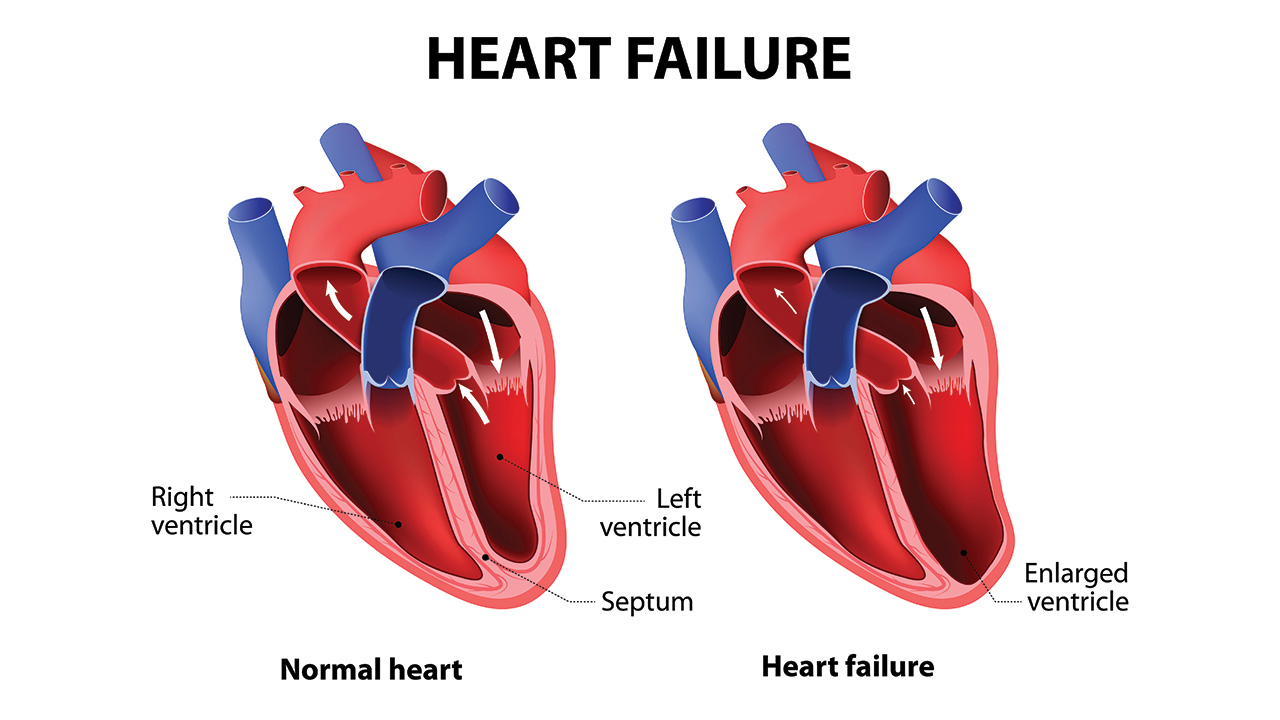

In [247]:
from IPython.display import Image
Image(filename='Hear_Failure.jpg')

<a id='intro'></a>
## Introduction

### More about the dataset
##### Dataset link: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?datasetId=1582403&sortBy=dateRun

###### Dataset Description:
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

##### Data Dictionary:

>1. Age: age of the patient [years]
>2. Sex: sex of the patient [M: Male, F: Female]
>3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
>4. RestingBP: resting blood pressure [mm Hg]
>5. Cholesterol: serum cholesterol [mm/dl]
>6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
>7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
>8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
>9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
>10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
>11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
>12. HeartDisease: output class [1: heart disease, 0: Normal]  ==> target


In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix

In [249]:
#import data
data = pd.read_csv("heart.csv",delimiter=",")

In [250]:
# top 10 rows 
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [252]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

###### The dataset contain 4  categorical features 

In [253]:
# statistical distribution of various features
data.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.23,0.42,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.55,0.50,0.0,0.00,1.0,1.0,1.0


<a id='wrangling'></a>
## Data Wrangling


In [254]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [255]:
data.isnull().values.any()
###### => The dataset do not contain any NaN values.

False

In [256]:
# Check if there are duplicate Values --> No duplicate Values
data.duplicated().sum()

0

In [257]:
# Age Values --> Valide Values
data.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [258]:
data.RestingBP.describe()
# The RestingBP Value should be greater 0 

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [13]:
data[data.RestingBP == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [14]:
#  Drop the 0 Value
# 0 to Nan
data.RestingBP =data.RestingBP.astype(int).replace(0,np.nan)

In [15]:
data.RestingBP.isnull().sum()

1

In [16]:
# drop the row for data.RestingBP has Nan
data.dropna(subset=["RestingBP"], inplace = True )

In [17]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [18]:
data.Cholesterol.describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [19]:
# Cholesterol Values muss be greater than 0
data[data.Cholesterol == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115.0,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95.0,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105.0,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145.0,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110.0,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122.0,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130.0,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102.0,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130.0,0,0,LVH,122,Y,1.0,Flat,1


In [20]:
# tranform 0 Values to Nan Value
data.Cholesterol =data.Cholesterol.astype(int).replace(0,np.nan)

In [21]:
data.Cholesterol.isnull().sum()

171

In [22]:
# feel the Nan values  using the mean value from n_neighbors nearest neighbors found in the training set. 
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
#imputer = KNNImputer(n_neighbors=2)
data.Cholesterol= imputer.fit_transform(data[["Cholesterol"]])

In [23]:
data.Cholesterol.isnull().sum()

0

In [24]:
# new data.Cholesterol 
data.Cholesterol.describe()

count    917.000000
mean     244.635389
std       53.347125
min       85.000000
25%      214.000000
50%      244.635389
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

In [25]:
data.Oldpeak.describe()
# the Oldpeak could be Negativ

count    917.000000
mean       0.886696
std        1.066960
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

In [26]:
# the ST Value (Oldpeak) should be converted to mv 
# http://www.grundkurs-ekg.de/auswertung/auswertung1.htm?fbclid=IwAR0ZZiD6D4VoUbBBa2odqYmIhIOkJ4dvsOjfRtB7ZQUpauhHZOIvPByLouY
data.Oldpeak = data.Oldpeak * 0.1

In [27]:
# the Values makes more Sense
data.Oldpeak.describe()

count    917.000000
mean       0.088670
std        0.106696
min       -0.260000
25%        0.000000
50%        0.060000
75%        0.150000
max        0.620000
Name: Oldpeak, dtype: float64

In [28]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,0.10,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,0.15,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.00,Up,0


In [29]:
# stored for visualization 
data1 = data

#### Categorical to Numerical

In [30]:
data["Sex"].value_counts()

M    724
F    193
Name: Sex, dtype: int64

In [31]:
#replace male as 0 and female as 1
data["Sex"] = data["Sex"].map({"M": 1, "F":0})

In [32]:
data["ChestPainType"].value_counts()

ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [33]:
# One-Hot Encoding 
# Get one Hot Encoding of columns Role
one_hot = pd.get_dummies(data["ChestPainType"])
# Drop column ChestPainType as it is now encoded 
data = data.drop("ChestPainType",axis = 1)
data = data.join(one_hot)   

In [34]:
data.head(3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA
0,40,1,140.0,289.0,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,0,160.0,180.0,0,Normal,156,N,0.1,Flat,1,0,0,1,0
2,37,1,130.0,283.0,0,ST,98,N,0.0,Up,0,0,1,0,0


In [35]:
data["RestingECG"].value_counts()

Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [36]:
# One-Hot Encoding 
# Get one Hot Encoding of columns Role
one_hot = pd.get_dummies(data["RestingECG"])
# Drop column ChestPainType as it is now encoded 
data = data.drop("RestingECG",axis = 1)
data = data.join(one_hot)   

In [37]:
data.head(3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST
0,40,1,140.0,289.0,0,172,N,0.0,Up,0,0,1,0,0,0,1,0
1,49,0,160.0,180.0,0,156,N,0.1,Flat,1,0,0,1,0,0,1,0
2,37,1,130.0,283.0,0,98,N,0.0,Up,0,0,1,0,0,0,0,1


In [38]:
data["ExerciseAngina"].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

In [39]:
#Label Encoder Function
LE = LabelEncoder()
data["ExerciseAngina"] = LE.fit_transform(data["ExerciseAngina"].values)

In [40]:
data["ST_Slope"].value_counts()

Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [41]:
# One-Hot Encoding 
# Get one Hot Encoding of columns Role
one_hot = pd.get_dummies(data["ST_Slope"])
# Drop column ChestPainType as it is now encoded 
data = data.drop("ST_Slope",axis = 1)
data = data.join(one_hot)   

In [42]:
data.head(3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,1,140.0,289.0,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160.0,180.0,0,156,0,0.1,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130.0,283.0,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1


In [43]:
# Number of elements for HeartDisease per category
print(data.HeartDisease.value_counts())

1    507
0    410
Name: HeartDisease, dtype: int64


In [44]:
# Create a fuction to change some columns Name
def rename_columns(df,col_Name):
    df.rename(columns=col_Name,inplace=True)

In [45]:
# columns bevor Change
data.columns.values

array(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ASY', 'ATA', 'NAP',
       'TA', 'LVH', 'Normal', 'ST', 'Down', 'Flat', 'Up'], dtype=object)

In [46]:
#Renaming
rename_columns(data,lambda x:x.replace("Sex", "Gender").replace("ChestPainType", "Chest-PainType").replace("FastingBS", "Fasting_BS").replace("RestingECG", "Resting_ECG").replace("MaxHR", "Max_HR").replace("ExerciseAngina", "Exercise_Angina").replace("HeartDisease", "Heart_Disease").lower().replace('-','_').rstrip().lstrip().replace(" ",""))

In [47]:
data.columns.values

array(['age', 'gender', 'restingbp', 'cholesterol', 'fasting_bs',
       'max_hr', 'exercise_angina', 'oldpeak', 'heart_disease', 'asy',
       'ata', 'nap', 'ta', 'lvh', 'normal', 'st', 'down', 'flat', 'up'],
      dtype=object)

In [48]:
# move heart_disease to the last column
a = data.heart_disease
data = data.drop("heart_disease",axis = 1)
data = data.join(a)

In [49]:
data.head(2)

,age,gender,restingbp,cholesterol,fasting_bs,max_hr,exercise_angina,oldpeak,asy,ata,nap,ta,lvh,normal,st,down,flat,up,heart_disease
0,40,1,140.0,289.0,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,49,0,160.0,180.0,0,156,0,0.1,0,0,1,0,0,1,0,0,1,0,1


In [50]:
# save cleaned Dataset 
data.to_csv('Cleaned_Dataset.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis


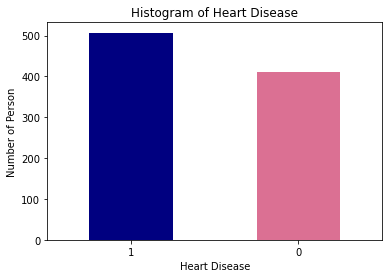

In [51]:
# count plot of the HeartDisease
plt.pyplot.title("Histogram of Heart Disease")
plt.pyplot.xlabel("Heart Disease")
plt.pyplot.ylabel("Number of Person")
c= data.heart_disease.value_counts().plot(kind='bar',color=['navy','palevioletred'] , rot = 0)

In [52]:
data.corr()

,age,gender,restingbp,cholesterol,fasting_bs,max_hr,exercise_angina,oldpeak,asy,ata,nap,ta,lvh,normal,st,down,flat,up,heart_disease
age,1.000000,0.055670,0.263084,0.053374,0.198170,-0.382280,0.216017,0.258563,0.166903,-0.218113,-0.011681,0.032083,0.145837,-0.230793,0.136903,0.138451,0.185499,-0.258027,0.282012
gender,0.055670,1.000000,0.009427,-0.101721,0.120424,-0.189668,0.191226,0.105444,0.184631,-0.161294,-0.067682,-0.003903,-0.049246,-0.011098,0.064009,0.066201,0.115596,-0.150537,0.305118
restingbp,0.263084,0.009427,1.000000,0.083076,0.067823,-0.109693,0.153064,0.174252,0.041568,-0.051374,-0.027536,0.049464,0.050648,-0.113759,0.089156,-0.010323,0.110171,-0.105969,0.117990
cholesterol,0.053374,-0.101721,0.083076,1.000000,0.043015,-0.017244,0.077578,0.053039,0.084587,-0.015290,-0.062349,-0.047323,0.075495,-0.042422,-0.024534,-0.008920,0.093678,-0.090032,0.094113
fasting_bs,0.198170,0.120424,0.067823,0.043015,1.000000,-0.131067,0.059988,0.053062,0.130629,-0.140844,-0.038201,0.026752,-0.011965,-0.092588,0.126853,0.104961,0.107683,-0.162346,0.267994
max_hr,-0.382280,-0.189668,-0.109693,-0.017244,-0.131067,1.000000,-0.370023,-0.161213,-0.354444,0.254214,0.133411,0.100235,0.126242,0.023181,-0.157561,-0.073127,-0.343641,0.384339,-0.401410
exercise_angina,0.216017,0.191226,0.153064,0.077578,0.059988,-0.370023,1.000000,0.409494,0.429495,-0.300947,-0.164722,-0.128362,-0.016847,-0.072246,0.106649,0.136251,0.383483,-0.456814,0.495490
oldpeak,0.258563,0.105444,0.174252,0.053039,0.053062,-0.161213,0.409494,1.000000,0.280936,-0.261903,-0.107615,0.032382,0.087140,-0.117293,0.056283,0.322371,0.282874,-0.450299,0.403638
asy,0.166903,0.184631,0.041568,0.084587,0.130629,-0.354444,0.429495,0.280936,1.000000,-0.523403,-0.576929,-0.249442,0.001691,-0.062707,0.075916,0.103157,0.305186,-0.360850,0.518339
ata,-0.218113,-0.161294,-0.051374,-0.015290,-0.140844,0.254214,-0.300947,-0.261903,-0.523403,1.000000,-0.256306,-0.110817,-0.086081,0.108422,-0.046381,-0.097913,-0.304346,0.357324,-0.401680


In [53]:
def plot_correlation_map( df ):
    matrix = np.triu(df.corr())
    fig, ax = plt.pyplot.subplots(figsize=(14,10)) 
    sns.heatmap (df.corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

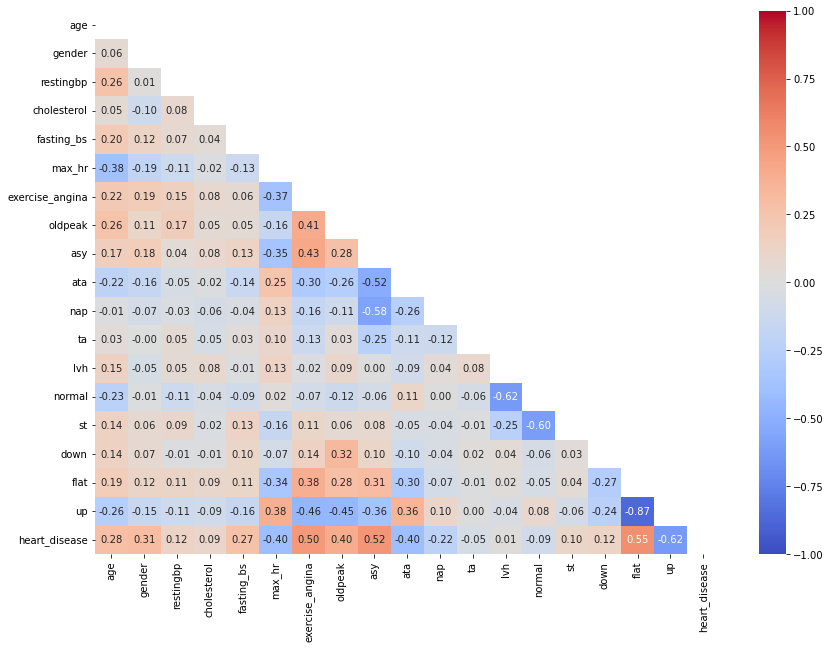

In [54]:
# correlation analysis using heatmap
plot_correlation_map(data)

###### ==>  There are 4 features " Up " ," flat" ,"asy" , "exercise_angina"  which are  good correlated to our target " heart_disease "  and  3 features "ata", "oldpeak" and  "max_hr"  are less correlated to our target

In [55]:
# drop colums, that don#t have any correlation
data.drop(["down","st","normal","lvh","ta","cholesterol","restingbp"],axis = 1,inplace = True)

In [56]:
data.head(2)

,age,gender,fasting_bs,max_hr,exercise_angina,oldpeak,asy,ata,nap,flat,up,heart_disease
0,40,1,0,172,0,0.0,0,1,0,0,1,0
1,49,0,0,156,0,0.1,0,0,1,1,0,1


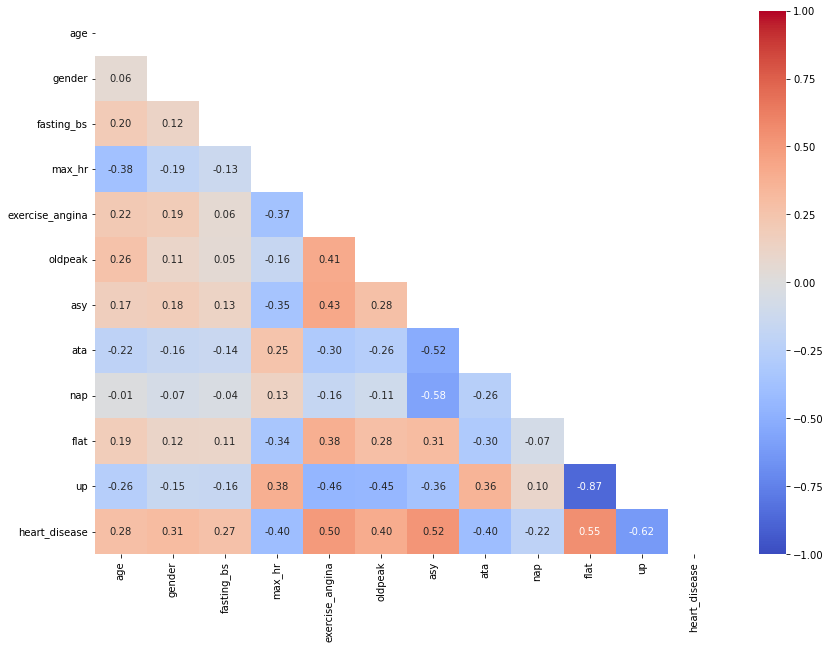

In [57]:
# correlation analysis using heatmap more transparent
plot_correlation_map(data)

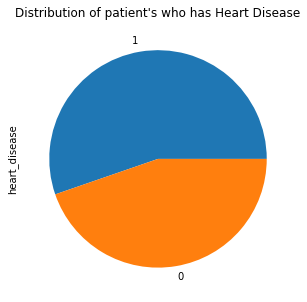

In [112]:
# heart_disease distribution
data.heart_disease.value_counts().plot(kind ="pie",title='Distribution of patient\'s who has Heart Disease' ,figsize =(5,5));

### More than 50% of people have Heart Disease 

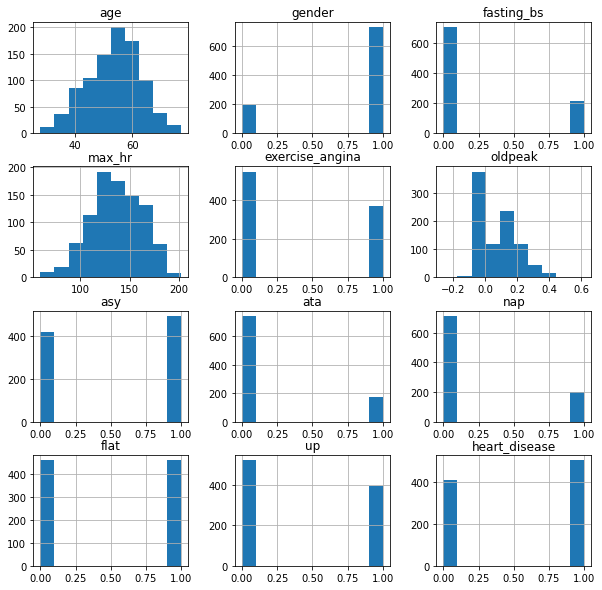

In [114]:
# explore data
data.hist(figsize =(10, 10));

#### An overview of how the data is distributed  

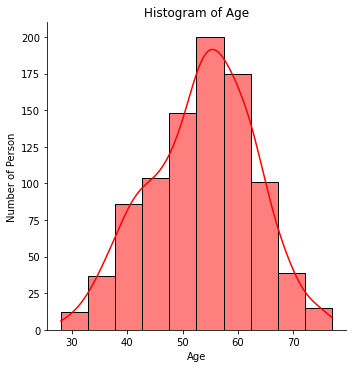

In [58]:
# count plot of the Age distribution
sns.displot(data.age,bins =10 , kde = True, color = "Red")
plt.pyplot.title("Histogram of Age")
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Number of Person");

In [59]:
data.groupby(by=['gender']).mean()['heart_disease']

gender
0    0.259067
1    0.631215
Name: heart_disease, dtype: float64

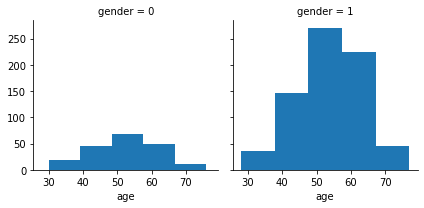

In [90]:
x = sns.FacetGrid(data, col = "gender")
x.map(plt.pyplot.hist,"age",bins = 5)

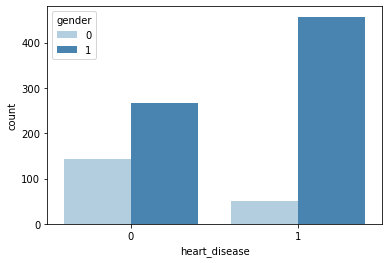

In [61]:
sns.color_palette()
ax = sns.countplot(x='heart_disease',hue = 'gender' ,data=data, palette='Blues')

###### ==> Males are more likely than females to have Heart failure

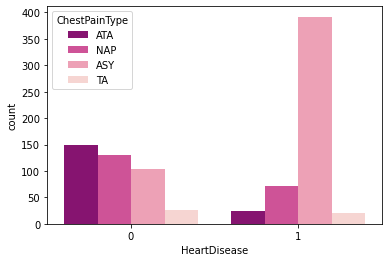

In [64]:
hc= sns.countplot(x='HeartDisease', hue='ChestPainType', data=data1, palette='RdPu_r')

###### ==> 0 i.e ASY : Asymptomatic is the most frequent type of chest pain among patients 

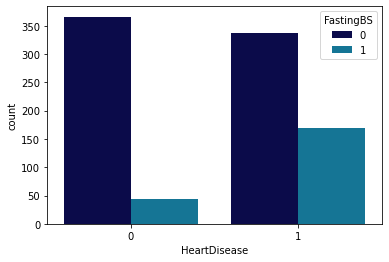

In [65]:
hf= sns.countplot(x='HeartDisease', hue='FastingBS', data=data1, palette='ocean')

###### ==> People who have fasting blood sugar are more likely to be ill

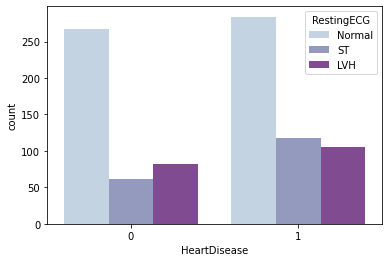

In [66]:
hr= sns.countplot(x='HeartDisease', hue='RestingECG', data=data1, palette='BuPu')

###### ==> This plot shows that the percentage of electrocardiogram having wave abnormality " ST" or showing probable or definite left ventricular hypertrophy " LVH ", increase for people who have Heart Disease.

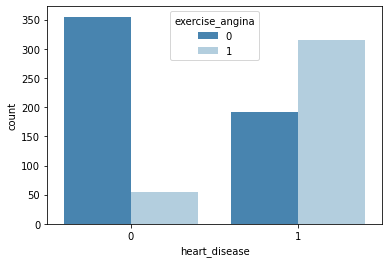

In [67]:
he= sns.countplot(x='heart_disease', hue='exercise_angina', data=data, palette='Blues_r')

###### ==> People who have Heart Disease get Angina pectoris caused by exercise " ExerciseAngina : 0 = No , 1 = Yes "

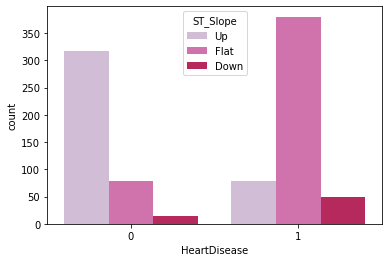

In [69]:
hs= sns.countplot(x='HeartDisease', hue='ST_Slope', data=data1, palette='PuRd')

###### ==> people who have a ST_slope = Flat, have a high probability to get a Heart Disease

In [75]:
data.head(1)

,age,gender,fasting_bs,max_hr,exercise_angina,oldpeak,asy,ata,nap,flat,up,heart_disease
0,40,1,0,172,0,0.0,0,1,0,0,1,0


In [93]:
# New_data = data.drop(["fasting_bs","max_hr" ,"exercise_angina", "oldpeak", "asy", "ata", "nap", "flat","up", "gender"], axis = 1)
# New_data.head(2)
# sns.boxplot(data = New_data)
# # Standardization
# from sklearn.preprocessing import StandardScaler
# scaler =StandardScaler()
# New_data.heart_disease = scaler.fit_transform(pd.DataFrame(New_data.heart_disease.values))
# New_data.age = scaler.fit_transform(pd.DataFrame(New_data.age.values))
# sns.boxplot(data = New_data);

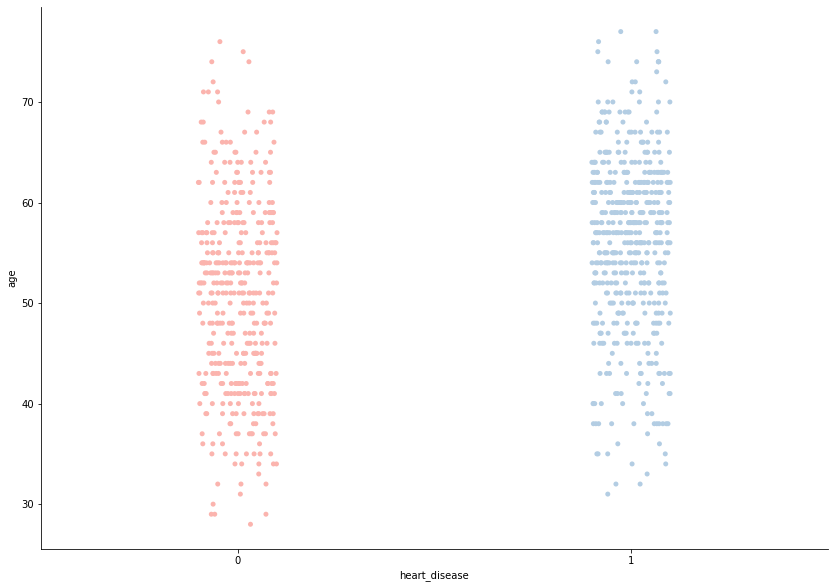

In [96]:
ha = sns.catplot(x="heart_disease", y="age", data=data , height=8.27, aspect=11.7/8.27, palette = 'Pastel1')

###### Distribution Heart Disease by Age 

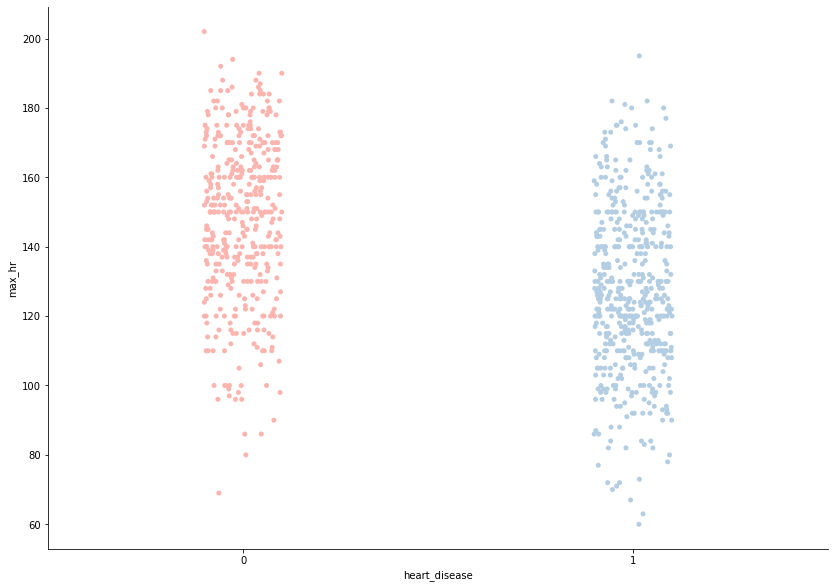

In [94]:
ha = sns.catplot(x="heart_disease", y="max_hr", data=data , height=8.27, aspect=11.7/8.27, palette = 'Pastel1')

###### Distribution Heart Disease by max_hr 

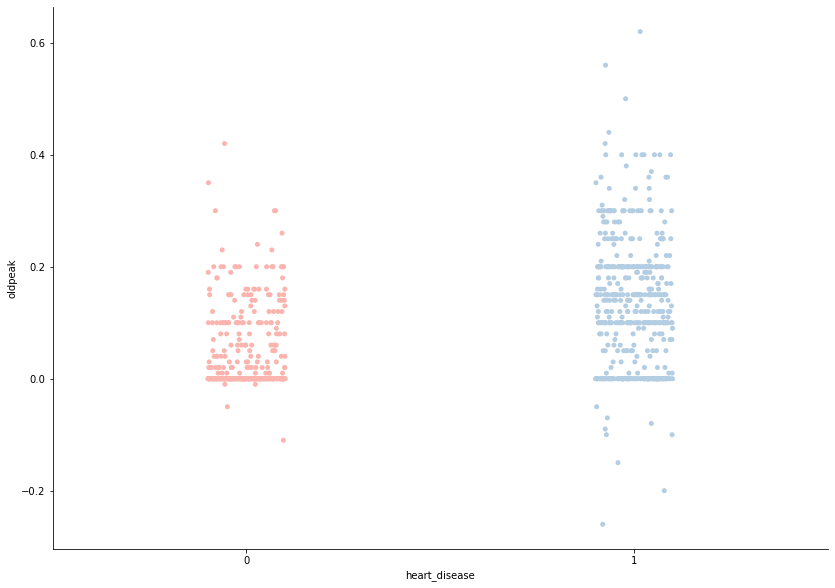

In [95]:
ha = sns.catplot(x="heart_disease", y="oldpeak", data=data , height=8.27, aspect=11.7/8.27, palette = 'Pastel1')

###### Distribution Heart Disease by oldpeak 

C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


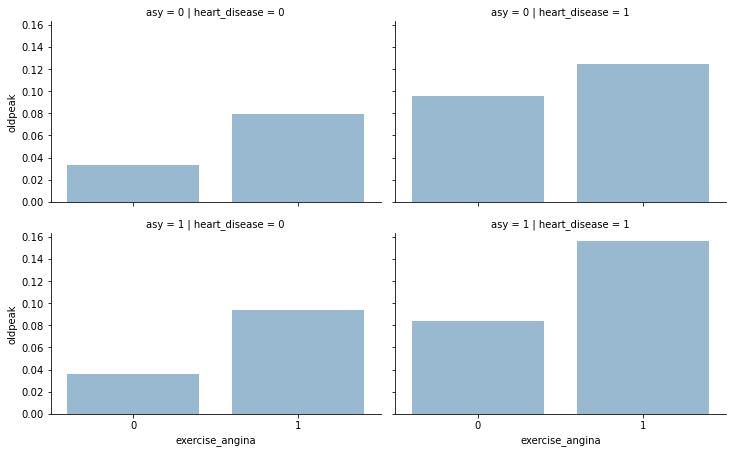

In [109]:
# Distribution of data asy and Heart Disease by exercise_angina and oldpeak
grid = sns.FacetGrid(data,row = "asy" ,col = "heart_disease", height = 3.2, aspect =1.6)

grid.map(sns.barplot,"exercise_angina","oldpeak", alpha =.5,ci = None)
grid.add_legend();

##### Persons with heart_disease have more often ExerciseAngina and ASY( Asymptomatic) and mostly high oldpeak

C:\Users\Abderrahmen Mansour\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


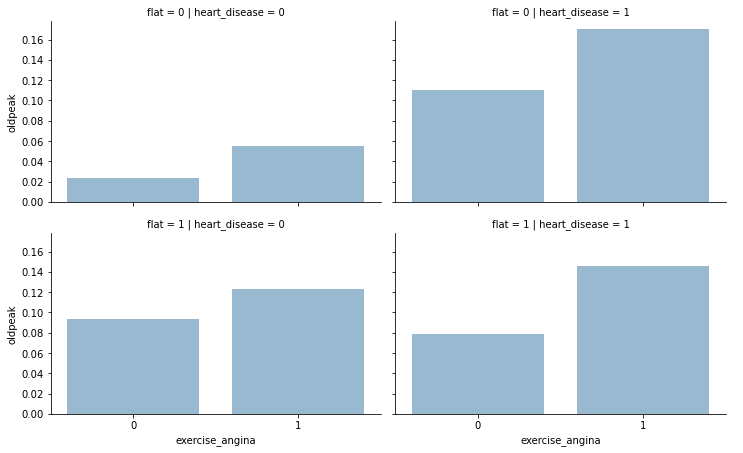

In [115]:
# Distribution of data Flat and Heart Disease by exercise_angina and oldpeak
grid = sns.FacetGrid(data,row = "flat" ,col = "heart_disease", height = 3.2, aspect =1.6)
grid.map(sns.barplot,"exercise_angina","oldpeak", alpha =.5,ci = None)
grid.add_legend();

##### Persons with heart_disease have more often ExerciseAngina and no flat  and mostly high oldpeak

<a id='Modeling'></a>
# Modeling


#### Splitting Data : Train/Test

In [194]:
# Features extraction
y=data['heart_disease'].values

#X=data.drop('heart_disease',axis=1).values
X=data.drop(['heart_disease',"nap","fasting_bs","gender","age"],axis=1).values

### Cross Validation 
The usual train_test_split method isn’t always the best since the splitting isn’t always random enough.

#### K-fold Definition
Cross-validation is very similar to train_test_split but instead of dividing the data into test/train we are going to:
1.	Shuffle the dataset randomly.
2.	Split the dataset into k groups
3.	For each unique group:

•	Take the first group as a test data set.

•	Take the remaining groups as a training data set.

•	Fit a model on the training set and evaluate it on the test set.

•	Save the model’s score.
4.	Summarize the accuracy of the model using the sample of model evaluation scores.


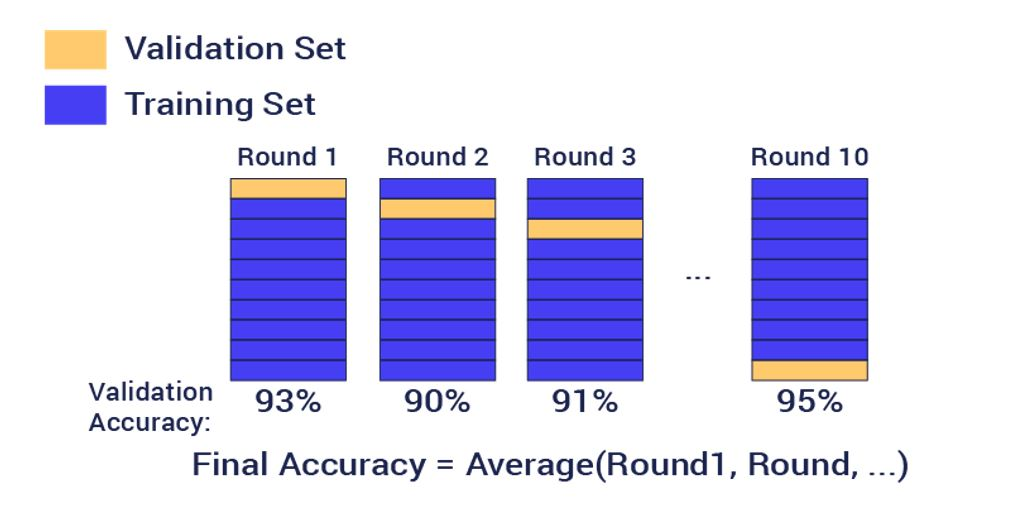

In [187]:
Image(filename='Cross Validation.jpg')

In [203]:
# Spliting Dat with 80 % for Train Sizeand 20 % for Test Size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Logistic Regression
Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

A common mistake is that people tend to confuse Linear regression and logistic regression.
You can think of logistic regression as a special case of linear regression when the outcome variable is categorical.


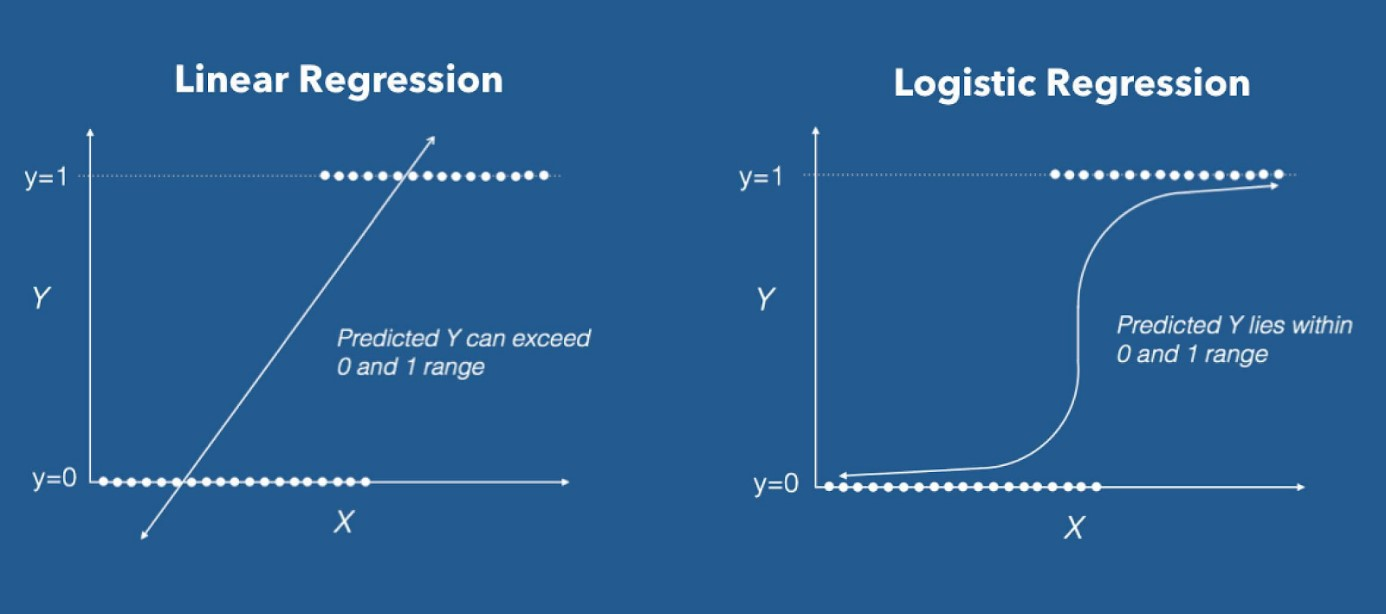

In [204]:
Image(filename='Logistic Regression.jpg')

##### Logistic Regression Concept
In fact, logistic regression is:

•	Used to predict a binary outcome (1 / 0), (yes / no)

•	Based on the concept of probability

To predict if a Person is getting Heart Disease or not (yes or no), we can use logistic regression.


##### Logistic Regression Probability
Since the output can only take binary values => Y will belong either to class A or B.

Let’s note here p = P(Y belongs A / X) = the probability of ( {Y belonging to class A } for a specific value of X).

In logistic regression, we have to predict the probability p as an output using sigmoid function as a model.

Let’s discover what a sigmoid function is and why we use it.

##### Sigmoid Function
The main reason we use a sigmoid function is because it exists between 0 and 1.

Therefore, it is especially used for models where we have to predict the probability as an output, since the probability of anything exists only between the range of 0 and 1.

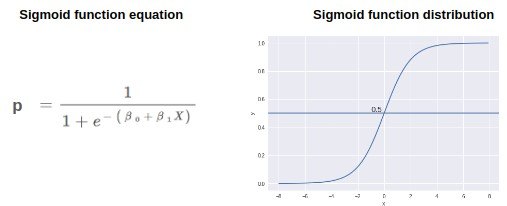

In [205]:
Image(filename='Sigmoid Function.jpg')

In [206]:
import warnings 
warnings.filterwarnings("ignore")

In [207]:
logreg = LogisticRegression() # build our logistic Model
logreg.fit(X_train, y_train) # fitting training Data
y_pred = logreg.predict(X_test) #testing model's performance
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test))) # cumpute Accuracy

Accuracy=0.83


##### Confusion Matrix
Just like accuracy, a confusion matrix is another way to evaluate logistic regression performance with more precision.

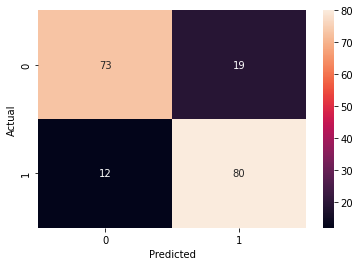

In [208]:
# confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ["Actual"], colnames = ["Predicted"])
# sns.heatmap(confusion_matrix, annot = True)
confusion_matrix(y_test, y_pred, normalize= "all")
ax =sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
ax.set(xlabel='Predicted', ylabel='Actual');

##### Confusion Matrix Interpretation

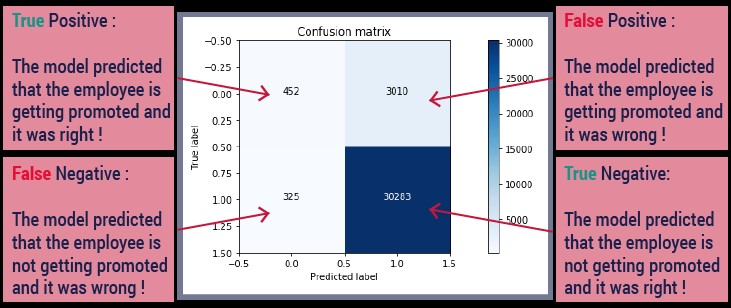

In [209]:
Image(filename='Confusion Matrix.jpg')

In [238]:
# calculate Accuracy using Cross Validation  as Train/Test Methode
scores = cross_val_score(logreg,X,y, cv =5) # Choosing Number of Subsets/folds
#print("Axxurancy on each fold/subset :",scores)
print("The average accuracy is ", round(sum(scores)/5,2))
Accuracy1 = round(sum(scores)/5,2)

The average accuracy is  0.82


## KNN
K-nearest-neighbor algorithm, often abbreviated KNN, is used to classify new data based on the assumption that it’s similar to its K-nearest neighbors.
Actually, we can summarize KNN in one sentence:


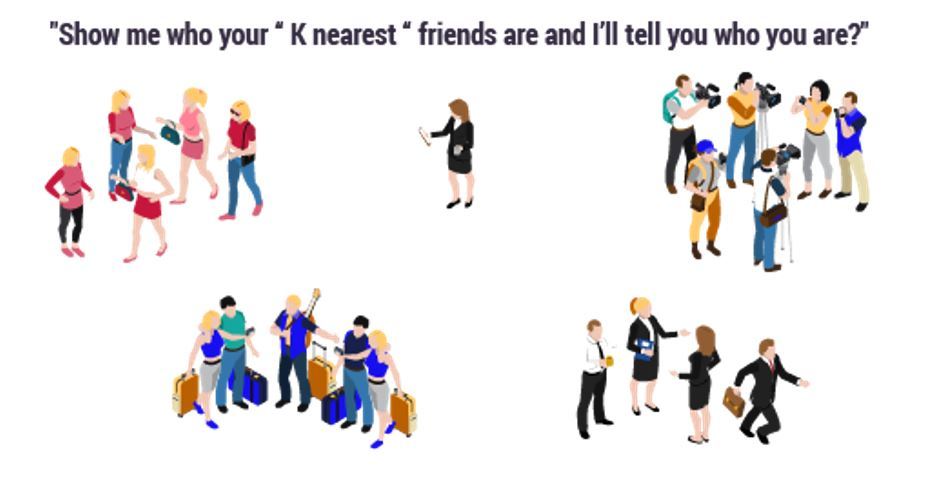

In [214]:
Image(filename='KNN_def.jpg')

## KNN Distance Parameter
The KNN algorithm gives the user the flexibility to choose distance while building the KNN model.

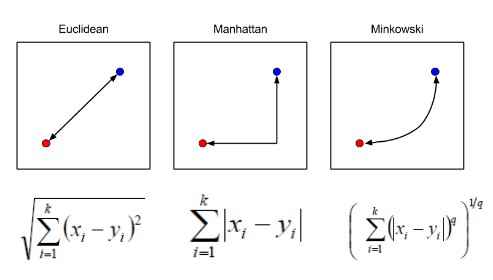

In [215]:
Image(filename='KNN Distance Parameter.jpg')

##### I used the Euclidean distance as metric 

In [217]:
knn = KNeighborsClassifier(n_neighbors=30,metric = 'euclidean') # Build Our KNN Classifier
scores = cross_val_score(knn,X,y, cv =5) # Choosing Number of Subsets/folds
print("Axxurancy on each fold/subset :",scores)
print("The average accuracy is ", round(sum(scores)/5,2))

Axxurancy on each fold/subset : [0.71195652 0.73369565 0.73224044 0.79234973 0.66120219]
The average accuracy is  0.73


In [234]:
knn = KNeighborsClassifier(n_neighbors=30,metric='euclidean') # Build Our KNN Classifier
knn.fit(X_train,y_train) # Training KNN Classifier
y_pred = knn.predict(X_test)  # Testing 
print('Accuracy = ', accuracy_score(y_pred,y_test)) # cumpute Accuracy for n = 30

Accuracy =  0.782608695652174


#### Optimal K Value
Choosing the right value of K can be really tricky. One of the ways to make that process easier is running a ”for loop“ and trying out different K values.

In [235]:
n_neighbors = 30
scr = []
for k in range(1,n_neighbors):
    knn=KNeighborsClassifier(k,metric='euclidean')
    scores = cross_val_score(knn,X,y, cv =5) # Choosing Number of Subsets/folds
    #print("Axxurancy on each fold/subset :",scores)
    print('The average Accuracy for k = ',k,' is ', round(sum(scores)/5,2))
    scr.append(round(sum(scores)/5,2))

The average Accuracy for k =  1  is  0.77
The average Accuracy for k =  2  is  0.72
The average Accuracy for k =  3  is  0.78
The average Accuracy for k =  4  is  0.78
The average Accuracy for k =  5  is  0.79
The average Accuracy for k =  6  is  0.79
The average Accuracy for k =  7  is  0.79
The average Accuracy for k =  8  is  0.79
The average Accuracy for k =  9  is  0.79
The average Accuracy for k =  10  is  0.8
The average Accuracy for k =  11  is  0.78
The average Accuracy for k =  12  is  0.78
The average Accuracy for k =  13  is  0.78
The average Accuracy for k =  14  is  0.78
The average Accuracy for k =  15  is  0.77
The average Accuracy for k =  16  is  0.78
The average Accuracy for k =  17  is  0.76
The average Accuracy for k =  18  is  0.77
The average Accuracy for k =  19  is  0.76
The average Accuracy for k =  20  is  0.76
The average Accuracy for k =  21  is  0.75
The average Accuracy for k =  22  is  0.74
The average Accuracy for k =  23  is  0.74
The average Accuracy 

In [219]:
# n_neighbors = 30
# scores = []
# for k in range(1,n_neighbors):
#     knn=KNeighborsClassifier(k,metric ='euclidean')
#     knn.fit(X_train,y_train) #Training our model
#     y_pred = knn.predict(X_test) #testing our model
#     print('Accuracy for k = ',k,' is ',round( accuracy_score(y_pred,y_test),2)) #Measuring the accuracy of our model for Each K Value
#     scores.append(round(accuracy_score(y_pred,y_test),2))

### Optimal K Value Plot

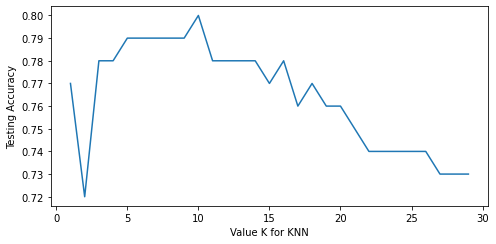

In [236]:
plt.pyplot.plot(range(1,30), scr)
plt.pyplot.xlabel('Value K for KNN')
plt.pyplot.ylabel('Testing Accuracy');

In [237]:
Accuracy2 = 0.80

##### ==> As we can see, the optimal k value with knn method is 10 with Accuracy 0.80

## Random Forest

## Random Forest Concept

You can think of random forest as several decision trees trained together with the “bagging method” with an extra step.
In a random forest we take a random selection of features rather than using all features to grow the trees.

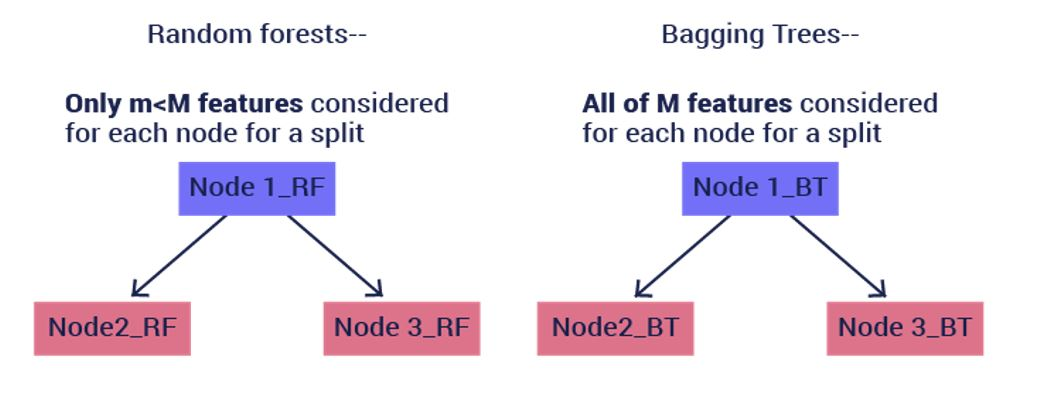

In [704]:
Image(filename='Random Forest Concept.jpg')

In [239]:
n_estimators = 20
for n in range(1,n_estimators):
    clf=RandomForestClassifier(n_estimators=n) #Creating a random forest with 10 decision trees
    scores = cross_val_score(clf,X,y, cv =5) # Choosing Number of Subsets/folds
    #print("Axxurancy on each fold/subset :",scores)
    print('The average Accuracy for n_estimators = ',n,' is ',"Accuracy:",round(sum(scores)/5,2)) #Measuring the accuracy of our model
    #print("The avrage accuracy is ", sum(scores)/5)
    
    #clf.fit(X_train,y_train) #Training our model
    #y_pred=clf.predict(X_test)   #testing our model   

The average Accuracy for n_estimators =  1  is  Accuracy: 0.77
The average Accuracy for n_estimators =  2  is  Accuracy: 0.74
The average Accuracy for n_estimators =  3  is  Accuracy: 0.78
The average Accuracy for n_estimators =  4  is  Accuracy: 0.79
The average Accuracy for n_estimators =  5  is  Accuracy: 0.79
The average Accuracy for n_estimators =  6  is  Accuracy: 0.78
The average Accuracy for n_estimators =  7  is  Accuracy: 0.81
The average Accuracy for n_estimators =  8  is  Accuracy: 0.79
The average Accuracy for n_estimators =  9  is  Accuracy: 0.8
The average Accuracy for n_estimators =  10  is  Accuracy: 0.79
The average Accuracy for n_estimators =  11  is  Accuracy: 0.79
The average Accuracy for n_estimators =  12  is  Accuracy: 0.8
The average Accuracy for n_estimators =  13  is  Accuracy: 0.8
The average Accuracy for n_estimators =  14  is  Accuracy: 0.8
The average Accuracy for n_estimators =  15  is  Accuracy: 0.79
The average Accuracy for n_estimators =  16  is  Accu

#### ==> As we can see, the optimal for n_estimators value with knn method is 7 with Accuracy 0.81

In [240]:
Accuracy3 = 0.81

<a id='conclusions'></a>
# Conclusion:


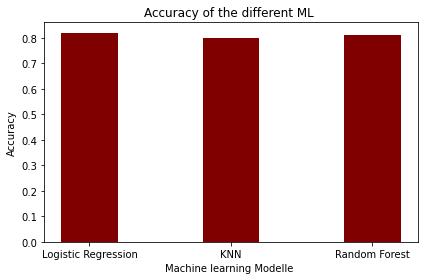

In [246]:
plt.pyplot.rcParams["figure.figsize"] = [7.00, 3.50]
z = {'Logistic Regression':Accuracy1, 'KNN':Accuracy2, 'Random Forest':Accuracy3}
courses = list(z.keys())
values = list(z.values())
  
fig = plt.pyplot.figure(figsize = (6, 4))
 
# creating the bar plot
plt.pyplot.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.pyplot.xlabel("Machine learning Modelle ")
plt.pyplot.ylabel("Accuracy")
plt.pyplot.title("Accuracy of the different ML ")
plt.pyplot.show()

Accordingly, in this study,

* We attempted to classify a classification problem in the heart disease dataset through a variety of models to classify heart disease predictions related to determining whether or not someone is likely to get heart disease based on input parameters such as gender, age, and various test results.

* We performed the detailed exploratory analysis (EDA).

* There were NO missing values in the dataset, Nevertheless, we did targeted cleaning of the data. 

* We decided which metrics to use.

* We analyzed both the target and the characteristics in detail.

* We converted categorical variables to  Numerical/dummies so we could use them in the models.

* We used two methods for split test/train data and used cross validation for more accuracy.

* We have chosen 3 different machine learning model on the well collated data 



* Finally, we visually checked the results of all the models to select the best model for the problem at hand.




>The Logistic Regression is the best modeling type with 0.82 of Accuracy 